### ZIRIBAGWA PETER MSC. BIOINFORMATICS
### AGASI HERBERT   MSC. BIOINFORMATICS
### RAZACK WASSWA   MSC. BIOINFORMATICS
### EVA AKURUT      MSC. BIOINFORMATICS
### GROUP  ASSIGNMENT

### 1.0 - LOADING THE NECCESARY LIBRARIES

In [1]:
#pip install xgboost
#pip install eli5
#pip install missingno

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#statistics
from scipy.stats import norm, skew #for some statistics

#Missing Info
import missingno as msno

#Dimentionality Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

from sklearn import cluster
import sklearn

#scikit learn libraries
#Lineaer Models
from sklearn.linear_model import BayesianRidge,RidgeCV,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Lineaer Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Tree
from sklearn.tree import DecisionTreeRegressor

#Ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from xgboost.sklearn import XGBRegressor


##
#eli5
import eli5
from eli5.sklearn import PermutationImportance

##
import sklearn.gaussian_process as gp

#Kaggle 
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#let's remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


###  IMPORTING THE DATASETS

In [3]:
## Loading the data
## Loading the data
Train = pd.read_csv("data/train.csv")
Test = pd.read_csv("data/test.csv")
Ids =Test["Id"]
Train.index = Train["Id"]
Test.index =Test["Id"]

### EXPLANATORY DATA ANALYSIS

### Display the first 10 rows of the train dataset

In [4]:
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


###  Checking the shape of the train dataset
- This out puts the number of rows and columns within the dataset

In [5]:
Train.shape

(1460, 81)

###  Display the first 10 rows of the test dataset

### Descriptive statistics on the Targert column Sale price
- This is a very important aspect especially on the target column. This determines which kind of problem we are trying to solve. 
- It is evident that this a regression  analysis problem by type of data represented in Sale Price

### What is Regression
Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them

Regression analysis includes several variations, such as linear, multiple linear, and nonlinear. The most common models are simple linear and multiple linear. Nonlinear regression analysis is commonly used for more complicated data sets in which the dependent and independent variables show a nonlinear relationship.



In [6]:
Train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###  A Histogram  and Line graph representing the distribution of the Sale Price
#### Looking at the distribution of the data 
- There are very few records above the 500,000 mark.
- The data appears to be left skewed a better graph will a better illustration.

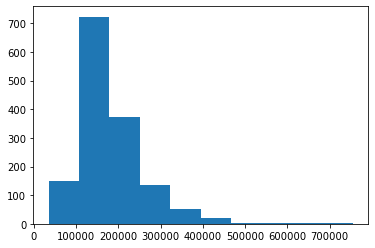

In [7]:
#Train.SalePrice.plot(kind='box')
plt.hist(Train.SalePrice)
#plt.density(Train.SalePrice)
plt.show()



Text(0.5, 1.0, 'An histogram showing the distribution of the SalePrice across the train dataset')

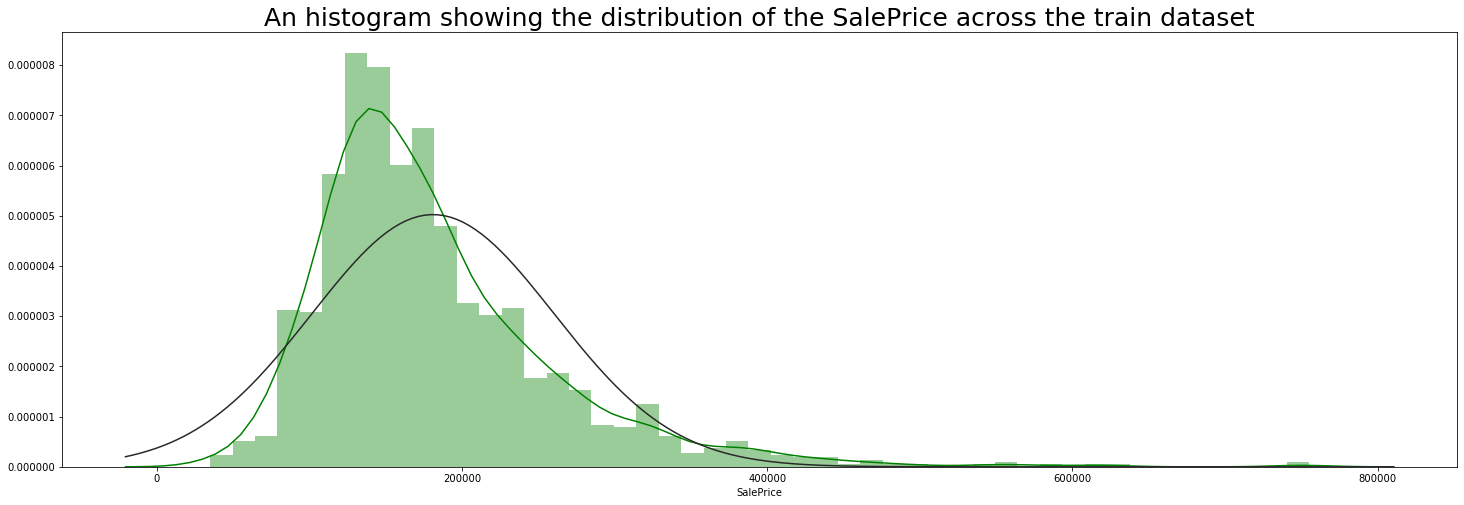

In [8]:
plt.figure(figsize=(25,8))
sns.distplot(Train['SalePrice'], fit=norm, color="green")
plt.title('An histogram showing the distribution of the SalePrice across the train dataset', fontsize=25)

#### Distribution and outliers acrros the Train dataset
- From the histogram above we can see the distribution of salesPrice. It is evident that the data is skewed to the left.
- This could be as a result of outliers so we can use a linegraph to represent our SalePrice acrross the dataset. 
- The points with the highest spikes will most likey represent the outliers and the region in the dataset.



Text(0, 0.5, 'sale price')

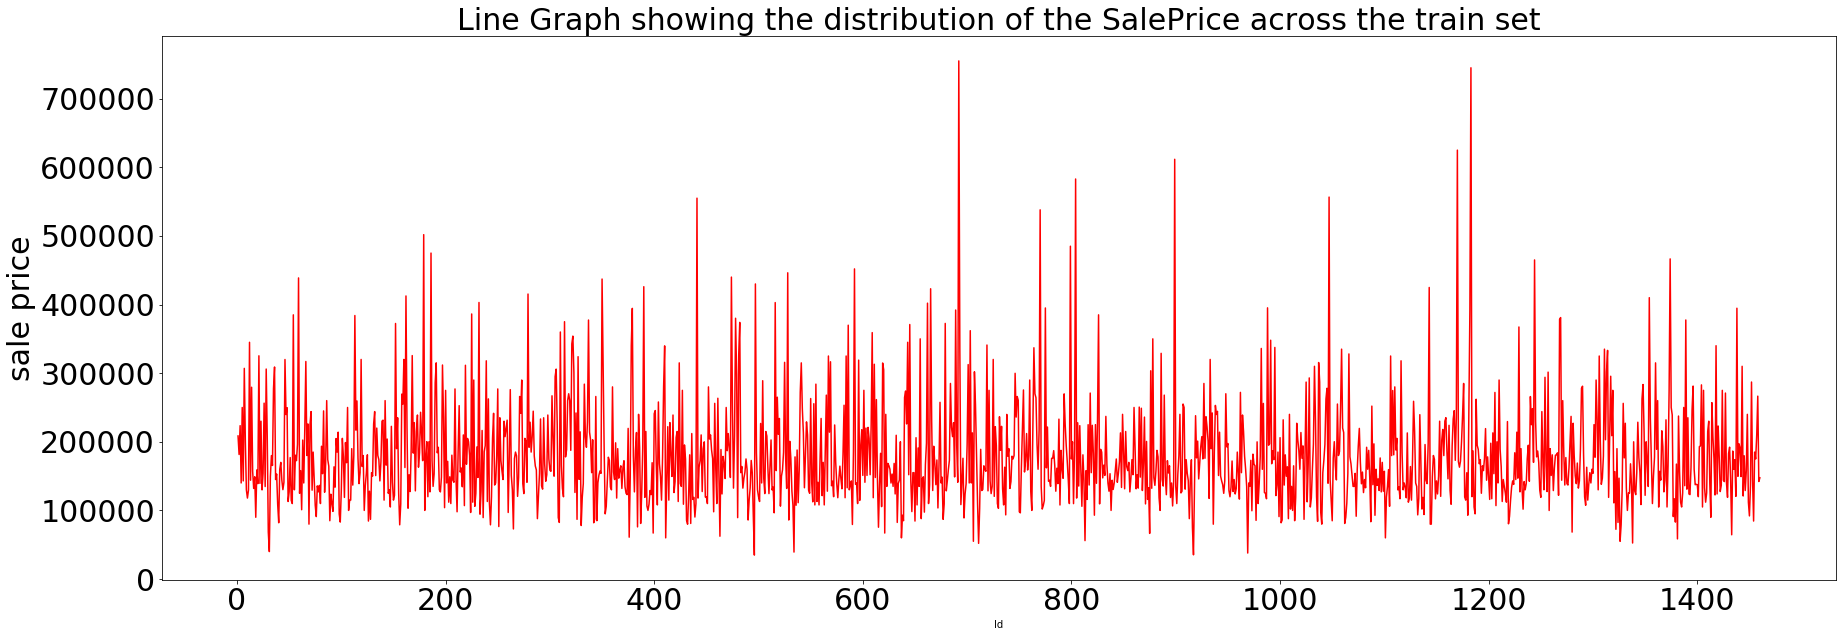

In [9]:
Train['SalePrice'].plot(fontsize=30,figsize = (30,10), color ='red')
plt.title('Line Graph showing the distribution of the SalePrice across the train set', fontsize=30)
plt.ylabel('sale price',fontsize = 30)

- From the line graph above we can see that most of amplitudes of the line graph don't exceed the  500000
- The biggest oultlier is around the 700th records with an amplitude of greater the 700000
- Even from this line graph we can also see the records are about 1420


#### Checking for the skewness of the SalePrice
- The skew is 1.8828

In [10]:
Train["SalePrice"].skew()

1.8828757597682129

#### Dropping the the rows that have values greater than 520000
- There are 8 rows with values above the 520000


In [11]:
Train[Train["SalePrice"]>520000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
441,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
692,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
770,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
804,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
899,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1047,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1170,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [12]:

Train.drop(Train[Train['SalePrice']>520000].index,inplace=True)

#### Testing the skew after dropping the columns above 520000
- The skew in 1.20800 there is reduction in the skewness however not good enough
- The dimensions of the Train dataset are (1452, 81)


In [13]:
Train["SalePrice"].skew()

1.2359845254980464

In [14]:
Train.shape

(1452, 81)

## Checking for the datatypes for the Train Dataset

There are numerous datatypes in Python Programming language. This is important because specific datatypes determine which values we can assign to the variables and which functions can be applied.
The datatypes in our dataset include Object, int64, and float64

- The data has 43 categorical features and 38 Numerical Features

In [15]:
Train.dtypes[:30], Train.dtypes[30:]

(Id                int64
 MSSubClass        int64
 MSZoning         object
 LotFrontage     float64
 LotArea           int64
 Street           object
 Alley            object
 LotShape         object
 LandContour      object
 Utilities        object
 LotConfig        object
 LandSlope        object
 Neighborhood     object
 Condition1       object
 Condition2       object
 BldgType         object
 HouseStyle       object
 OverallQual       int64
 OverallCond       int64
 YearBuilt         int64
 YearRemodAdd      int64
 RoofStyle        object
 RoofMatl         object
 Exterior1st      object
 Exterior2nd      object
 MasVnrType       object
 MasVnrArea      float64
 ExterQual        object
 ExterCond        object
 Foundation       object
 dtype: object,
 BsmtQual          object
 BsmtCond          object
 BsmtExposure      object
 BsmtFinType1      object
 BsmtFinSF1         int64
 BsmtFinType2      object
 BsmtFinSF2         int64
 BsmtUnfSF          int64
 TotalBsmtSF        int64


### Preview of the categorical Features
Here we try to identify the the columns that contain the datatype object. This is important because mathematical operations cannot be peformed on them as long as they are still of datatype object.

This would also explain the limited number of features on some operation like Correlation. Only Feature of a Numerical format will be considered. 


In [16]:
## Filtering out columns that have categorical data to loo
arr=[]
for x,y in enumerate(Train.dtypes):
    if(y=="object"):
        arr.append(x)
x=Train.columns[arr]
print(x)
print(len(x))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


### Looking at t preview of the data these columns have a very suspicous
1. MasVnrArea
2. BsmtFinSF2
3. 2ndFlrSF
4. WoodDeckSF
5. OpenPorchSF
6. EnclosedPorch
7. 3SsnPorch
8. ScreenPorch
9. PoolArea
10. PoolQC
11. Fence
12. MiscFeature
13. MiscVal
14. MoSold
15. LowQualFinSF


## DATA CLEANING
### Handle Missing Data
Missing data is a deceptively tricky issue in applied machine learning.
First, just to be clear, you cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that most algorithms do not accept missing values.

- Dropping observations that have missing values
- Imputing the missing values based on other observations
- Dropping missing values is sub-optimal because when you drop observations, you drop information.

The fact that the value was missing may be informative in itself.
Plus, in the real world, you often need to make predictions on new data even if some of the features are missing!
Imputing missing values is sub-optimal because the value was originally missing but you filled it in, which always leads to a loss in information, no matter how sophisticated your imputation method is.

### Missing categorical data
The best way to handle missing data for categorical features is to simply label them as ’Missing’!
You’re essentially adding a new class for the feature.
This tells the algorithm that the value was missing.
This also gets around the technical requirement for no missing values.

### Missing numeric data
For missing numeric data, you should flag and fill the values.
Flag the observation with an indicator variable of missingness.
Then, fill the original missing value with 0 just to meet the technical requirement of no missing values.
By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for missingness, instead of just filling it in with the mean.

### Filter Unwanted Outliers
Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models.

In general, if you have a legitimate reason to remove an outlier, it will help your model’s performance.

However, outliers are innocent until proven guilty. You should never remove an outlier just because it’s a "big number." That big number could be very informative for your model.

###  A plot showing the missing data matrix of the train dataset
- This shows the missing data patterns with in the database
- The sparkline on the right gives a summary of the general shape of the data completeness

Text(0.5, 1.0, 'A PLOT SHOWING THE MISSING DATA MATRIX')

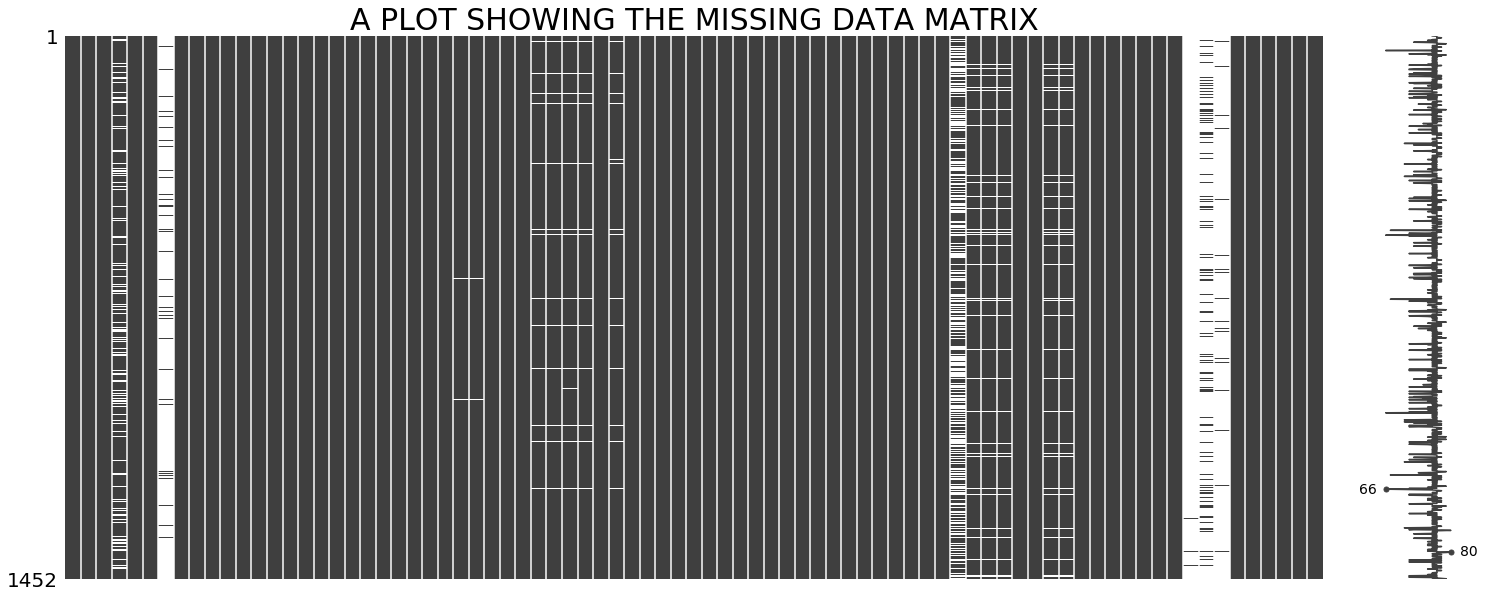

In [17]:
msno.matrix(Train)
plt.title('A PLOT SHOWING THE MISSING DATA MATRIX', fontsize=30)

### A heatmap showing the nullity of the train dataset
- The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1); the features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed.
- A perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

Text(0.5, 1, 'A HEATMAP SHOWING A CORRELATION OF MISSING DATA BETWEEN ATTRIBUTES IN THE TRAIN DATASET')

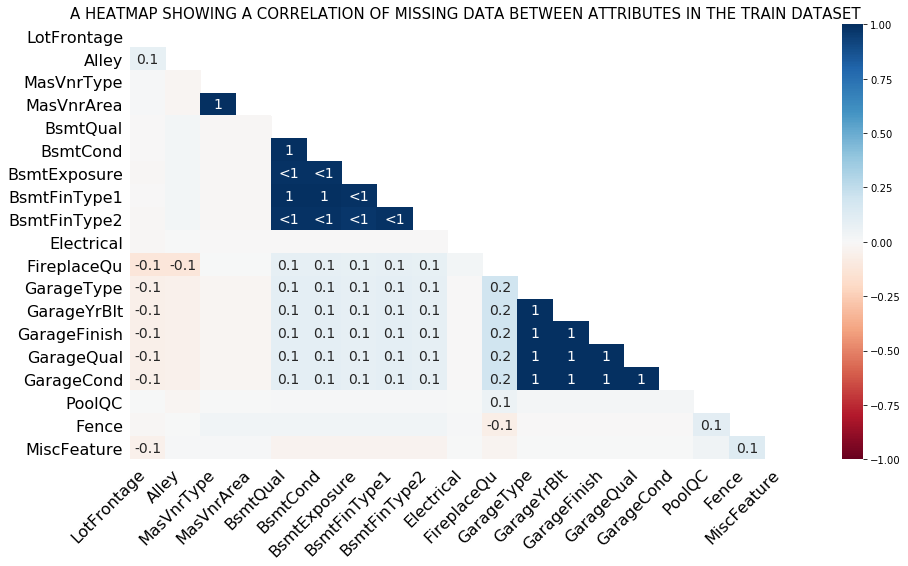

In [18]:
msno.heatmap(Train,figsize=(15,8))
plt.title('A HEATMAP SHOWING A CORRELATION OF MISSING DATA BETWEEN ATTRIBUTES IN THE TRAIN DATASET', fontsize=15)

###  Visualising the percentage of  missing data per column using a histogram

Text(0.5, 1.0, 'Percentage of null values per attribute')

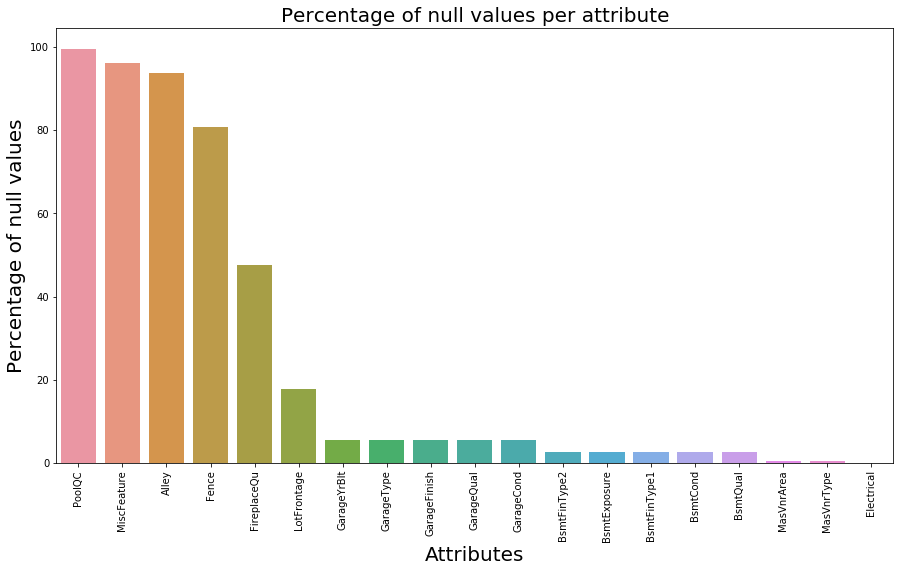

In [19]:
Train_clone = Train.copy() # this makes a clone of the train dataset and names it 'train_clone'

### Now i use the train_clone dataset to compute the percentage of unknown values in each column
columns_with_NaNs = Train_clone.isnull().sum() #  first assign all the output into this object
columns_with_NaNs = columns_with_NaNs.drop(columns_with_NaNs[columns_with_NaNs==0].index) # filter out only those greater than 0. this because zero means no NaNs and those greater than zero indicate the presence of NaNs
columns_with_NaNs = columns_with_NaNs.sort_values(ascending=False) # sort them in descending order
columns_with_NaNs =  columns_with_NaNs / len(Train_clone)*100

### Plot the percentages on a histogram
f, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation='90')
sns.barplot(x=columns_with_NaNs.index, y=columns_with_NaNs)
plt.xlabel('Attributes', fontsize=20)
plt.ylabel('Percentage of null values', fontsize=20)
plt.title('Percentage of null values per attribute', fontsize=20)

#### Dropping columns with high number of nulls 
- Alley           1369
- PoolQC           1453
- Fence            1179
- MiscFeature      1406
- LotFrontage      259
- FireplaceQu       690

In [20]:

Train =Train.drop(axis=1,columns=["FireplaceQu","LotFrontage","MiscFeature","Fence","PoolQC","Alley"])


Tran =Train.dropna(axis=0, how="any",subset=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                                             "BsmtFinType2","GarageType","GarageYrBlt","GarageFinish",
                                             "GarageQual","GarageCond","MasVnrType","MasVnrArea","Electrical"
                                            ],inplace=True)

Test =Test.drop(axis=1,columns=["FireplaceQu","LotFrontage","MiscFeature","Fence","PoolQC","Alley"])


In [21]:
#Confirming there are no nulls

Train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [22]:
#Handling Missing values int Test dataset
Test = Test.fillna(Test.mean())
Test.isna().sum().sum()

555

In [23]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1330 non-null   int64  
 1   MSSubClass     1330 non-null   int64  
 2   MSZoning       1330 non-null   object 
 3   LotArea        1330 non-null   int64  
 4   Street         1330 non-null   object 
 5   LotShape       1330 non-null   object 
 6   LandContour    1330 non-null   object 
 7   Utilities      1330 non-null   object 
 8   LotConfig      1330 non-null   object 
 9   LandSlope      1330 non-null   object 
 10  Neighborhood   1330 non-null   object 
 11  Condition1     1330 non-null   object 
 12  Condition2     1330 non-null   object 
 13  BldgType       1330 non-null   object 
 14  HouseStyle     1330 non-null   object 
 15  OverallQual    1330 non-null   int64  
 16  OverallCond    1330 non-null   int64  
 17  YearBuilt      1330 non-null   int64  
 18  YearRemo

### Visualise correlation between numerical features and the saleprice

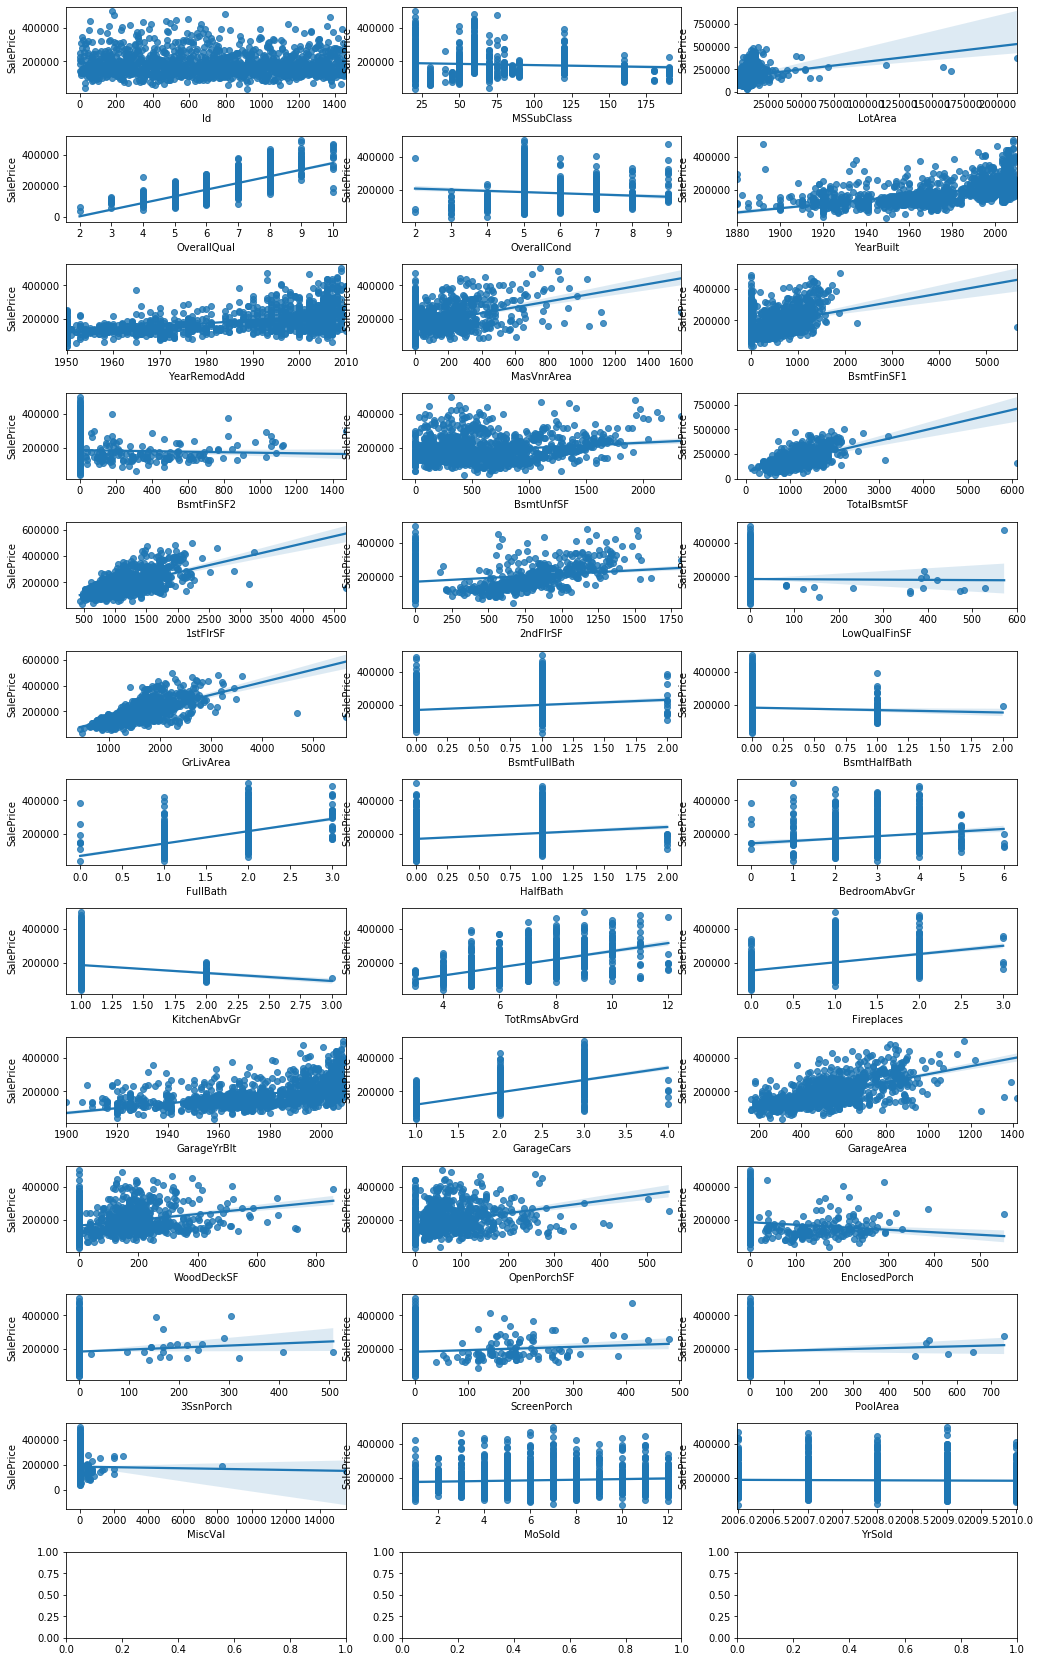

In [24]:
# select out only numerical values
Train_numerical = Train.select_dtypes(include=[np.number])

fig, axs = plt.subplots(13,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(Train_numerical.columns):
    if col != 'SalePrice':
        sns.regplot(Train_numerical[col], Train_numerical['SalePrice'], ax = axs[ind])
    
plt.show()

 ### Visualizing the distribution of the categorical features in relation to the saleprice

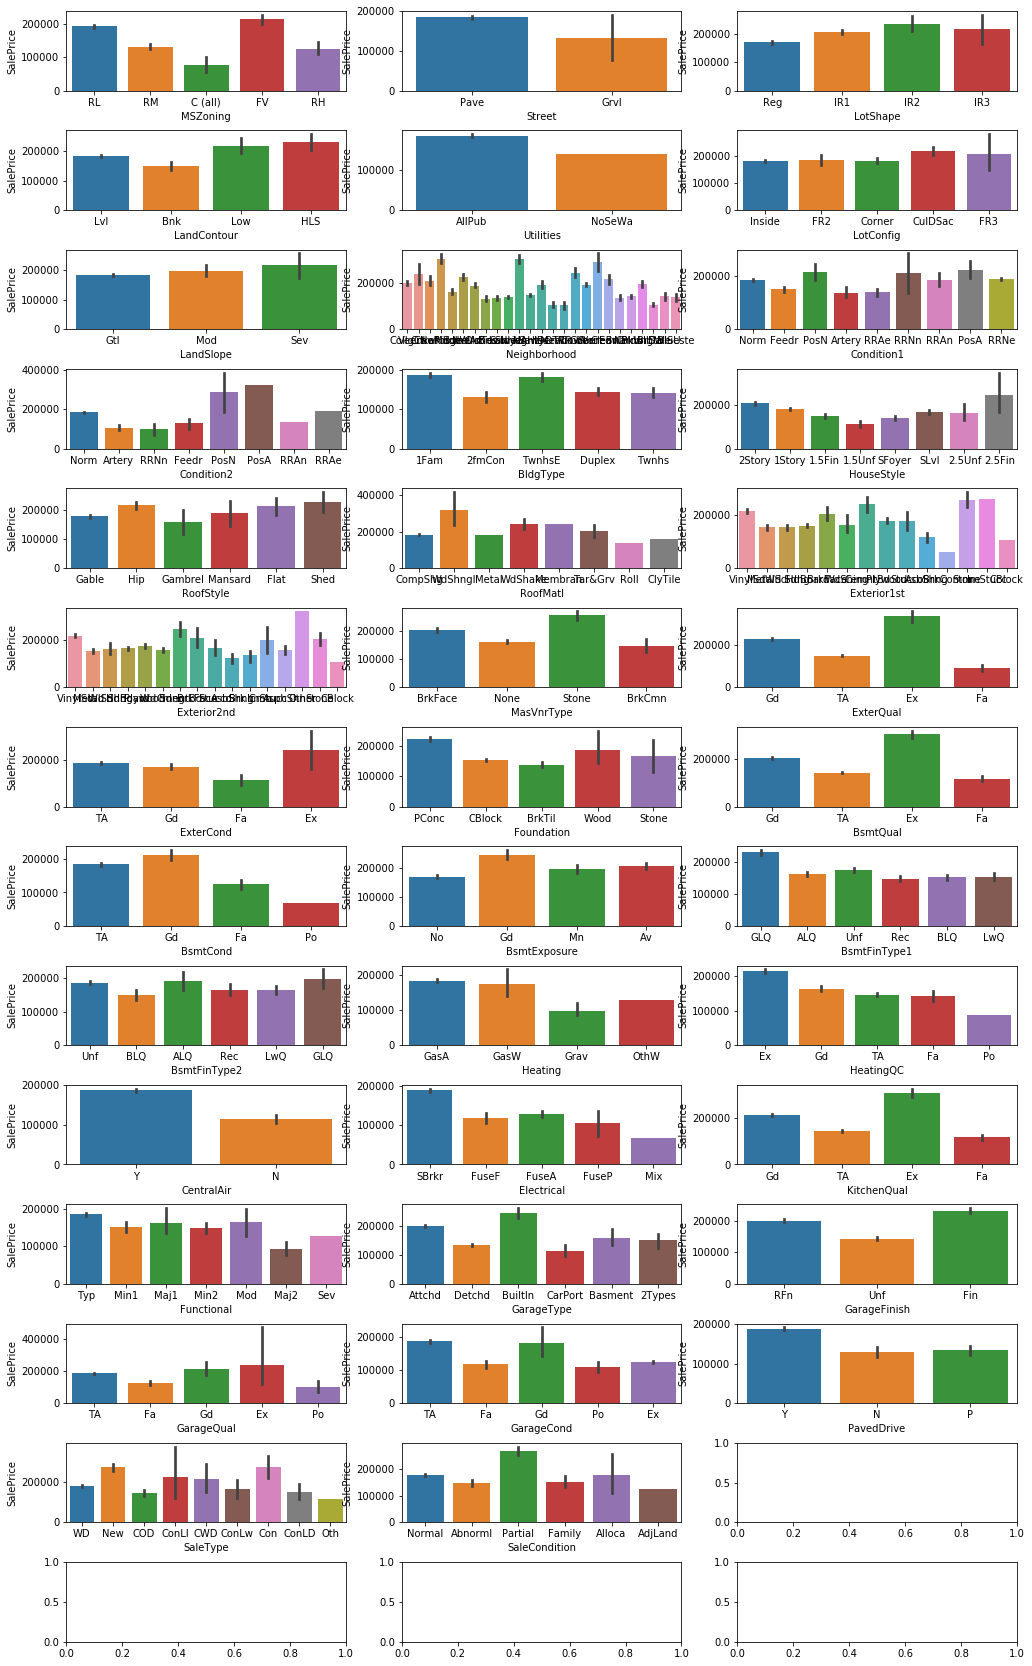

In [25]:
pd.set_option('chained',None)

# select out only columns having categorical data i.e, exclude those with numbers as shown in the command below
Train_categorical  = Train.select_dtypes(exclude=[np.number])

#add the SalePrice column
Train_categorical['SalePrice'] = Train['SalePrice']

fig, axs = plt.subplots(14,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(Train_categorical.columns):
    if col != 'SalePrice':
        sns.barplot(Train_categorical[col], Train_categorical['SalePrice'], ax = axs[ind])

plt.show()

## Encoding the categorical variables

Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded.

Categorical variables can be divided into two categories: Nominal (No particular order) and Ordinal (some ordered).
There are many ways we can encode these categorical variables as numbers and use them in an algorithm.

#### One Hot Encoding
In this method, we map each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features. This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature. 

#### Label Encoding
In this encoding, each category is assigned a value from 1 through N (here N is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order, or there is some relationship. 

#### Ordinal Encoding
Ordinal encoding is done to ensure the encoding of variables retains the ordinal nature of the variable.
This encoding looks almost similar to Label Encoding but slightly different as Label coding would not consider whether variable is ordinal or not and it will assign sequence of integers

#### Prefered Approch
Label Econding

In [26]:
Catcols = Train.select_dtypes(include="O")

for cols in Catcols:
    # converting type of columns to 'category'
    Train[cols] = Train[cols].astype('category')
    # Assigning numerical values 
    Train[cols] = Train[cols].cat.codes
Train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


### Encodoing the Test data as well 

In [27]:
Testcols = Test.select_dtypes(include="O")
for cols in Testcols:
    # converting type of columns to 'category'
    Test[cols] =Test[cols].astype('category')
    # Assigning numerical values 
    Test[cols] = Test[cols].cat.codes
Test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1462,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
1463,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
1464,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
1465,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [28]:
Test.isna().sum()[:30],Test.isna().sum()[30:]

(Id              0
 MSSubClass      0
 MSZoning        0
 LotArea         0
 Street          0
 LotShape        0
 LandContour     0
 Utilities       0
 LotConfig       0
 LandSlope       0
 Neighborhood    0
 Condition1      0
 Condition2      0
 BldgType        0
 HouseStyle      0
 OverallQual     0
 OverallCond     0
 YearBuilt       0
 YearRemodAdd    0
 RoofStyle       0
 RoofMatl        0
 Exterior1st     0
 Exterior2nd     0
 MasVnrType      0
 MasVnrArea      0
 ExterQual       0
 ExterCond       0
 Foundation      0
 BsmtQual        0
 BsmtCond        0
 dtype: int64,
 BsmtExposure     0
 BsmtFinType1     0
 BsmtFinSF1       0
 BsmtFinType2     0
 BsmtFinSF2       0
 BsmtUnfSF        0
 TotalBsmtSF      0
 Heating          0
 HeatingQC        0
 CentralAir       0
 Electrical       0
 1stFlrSF         0
 2ndFlrSF         0
 LowQualFinSF     0
 GrLivArea        0
 BsmtFullBath     0
 BsmtHalfBath     0
 FullBath         0
 HalfBath         0
 BedroomAbvGr     0
 KitchenAbvGr  

In [29]:
Train.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,...,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,730.359398,56.172932,3.024060,10631.806767,0.996241,1.909774,2.787970,0.000752,3.006015,0.063158,...,21.391729,3.607519,16.103008,2.611278,43.190977,6.342857,2007.804511,7.501504,3.804511,184148.942857
std,422.497250,41.351966,0.626256,10270.188246,0.061222,1.417714,0.687526,0.027420,1.628830,0.277979,...,61.004378,30.314170,57.619591,39.266794,509.572146,2.697107,1.328954,1.583516,1.056412,71304.880396
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,364.250000,20.000000,3.000000,7731.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,135000.000000
50%,728.500000,50.000000,3.000000,9590.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,168000.000000
75%,1098.750000,70.000000,3.000000,11698.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,218907.500000
max,1460.000000,190.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,501837.000000


# Permutation Importance

Permutation Importance is an algorithm that computes importance scores for each of the feature variables of a dataset,
The importance measures are determined by computing the sensitivity of a model to random permutations of feature values.

#### How it works.
We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature.
- A feature is “important” if shuffling its values increases the model error because in this case, the model relied on the feature for the prediction.
- A feature is “unimportant” if shuffling its values leave the model error unchanged because in this case, the model ignored the feature for the prediction.

#### Permutation Importance is done on Test data
permutation importance based on training data is garbage. The permutation importance based on training data makes us mistakenly believe that features are important for the predictions when in reality the model was just overfitting and the features were not important at all.

In [32]:
X = Train.drop("SalePrice",axis=1) 
y=Train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb1=XGBRegressor()
xgb1.fit(X_train, y_train)


ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)

RANDF= RandomForestRegressor()
RANDF.fit(X_train,y_train)

perm  = PermutationImportance(xgb1).fit(X_test, y_test)
perm1 = PermutationImportance(ETR).fit(X_test, y_test)
perm2 = PermutationImportance(RANDF).fit(X_test, y_test)
eli5.show_weights(perm)
#eli5.permutation_importance.get_score_importances(perm)
eli5.explain_weights_df(perm)[:15],eli5.explain_weights_df(perm1)[:15],eli5.explain_weights_df(perm2)[:15]



(   feature    weight       std
 0      x15  0.248413  0.034178
 1      x44  0.185098  0.030815
 2      x32  0.035290  0.006371
 3      x36  0.032073  0.005110
 4      x17  0.025606  0.005322
 5       x3  0.021470  0.005037
 6      x41  0.017675  0.003362
 7      x58  0.016388  0.004756
 8      x18  0.014866  0.006516
 9       x1  0.007293  0.005964
 10     x28  0.006955  0.002566
 11     x16  0.006665  0.004995
 12      x6  0.004723  0.010051
 13     x57  0.004641  0.001336
 14      x2  0.004452  0.004858,
    feature    weight       std
 0      x15  0.147214  0.015971
 1      x44  0.101813  0.010452
 2      x58  0.044807  0.006802
 3      x47  0.018761  0.002156
 4      x25  0.018561  0.002749
 5      x41  0.015434  0.003762
 6      x32  0.011959  0.003885
 7      x54  0.010642  0.001845
 8      x36  0.010107  0.001208
 9      x45  0.006453  0.001362
 10     x28  0.006300  0.002698
 11     x63  0.005768  0.002307
 12     x51  0.005687  0.002073
 13      x3  0.004756  0.000769
 14    

In [33]:
Train.columns
Df = pd.DataFrame(zip(Train.columns,ETR.feature_importances_),columns=["Feature","Weight"])
Df.sort_values("Weight",ascending=False)[:15]


,Feature,Weight
15,OverallQual,0.224042
58,GarageCars,0.139744
25,ExterQual,0.105651
44,GrLivArea,0.088506
28,BsmtQual,0.061405
47,FullBath,0.052659
51,KitchenQual,0.038029
57,GarageFinish,0.023329
17,YearBuilt,0.019314
41,1stFlrSF,0.018418


## Feature Selection And Description
1. 44 GrLivArea
    - Above grade (ground) living area square feet
2. 15 OverallQual
    - Rates the overall material and finish of the house
3. 36 TotalBsmtSF
    - Total square feet of basement area
4. 17 YearBuilt
    - Original construction date
5. 32 BsmtFinSF1
    - Type 1 finished square feet
6. 18 YearRemodAdd
    - Remodel date (same as construction date if no remodeling or additions)
7. 3 LotArea
    - Lot size in square feet
8. 51 KitchenQual
    - Kitchen quality
9. 16 OverallCond
    - Rates the overall condition of the house
10. 58 GarageCars
    - Size of garage in car capacity
11.  28 ExterCond
    - Evaluates the present condition of the material on the exterior
12.  1 MSSubClass
    - Identifies the type of dwelling involved in the sale.
13. 2 MSZoning
    - Identifies the general zoning classification of the sale.
14. 57 FireplaceQu
    - Fireplace quality
15. 41 1stFlrSF
    


In [34]:
Train1 =Train[["GrLivArea","OverallQual", "TotalBsmtSF","BsmtFinSF1","LotArea","KitchenQual","YearBuilt","YearRemodAdd","GarageCars","1stFlrSF","BsmtFullBath","CentralAir","HouseStyle","SalePrice"]]
Train1.shape

(1330, 14)

#### Correlation of the selected Features with SalePrice
- As seen from the graph below a number of features are correlated with the SalePrice hence willposivitely impact model
- Two of the features are however negatice correlated i.e. KitchenQual and MSZoning which mean an inverse relationship

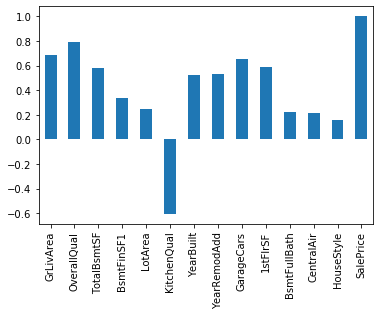

In [35]:
Train1.corr()['SalePrice'].plot(kind="bar")

In [36]:
## Since we only what features that are highly correlated we will drop the 
#OverallCond and MSSUblass from the train dataset.

In [37]:
Train.iloc[1:5,41].head()

Id
2    1262
3     920
4     961
5    1145
Name: 1stFlrSF, dtype: int64

### Selecting the features basing on Permutation Importance

In [38]:
Train =Train[["GrLivArea","OverallQual", "TotalBsmtSF","BsmtFinSF1","LotArea","KitchenQual","YearBuilt","YearRemodAdd","GarageCars","1stFlrSF","FullBath","CentralAir","HouseStyle","SalePrice"]]

Test = Test[["GrLivArea","OverallQual", "TotalBsmtSF","BsmtFinSF1","LotArea","KitchenQual","YearBuilt","YearRemodAdd","GarageCars","1stFlrSF","FullBath","CentralAir","HouseStyle"]]
Test = Test.fillna(Test.mean())

In [39]:
Test

,GrLivArea,OverallQual,TotalBsmtSF,BsmtFinSF1,LotArea,KitchenQual,YearBuilt,YearRemodAdd,GarageCars,1stFlrSF,FullBath,CentralAir,HouseStyle
Id,,,,,,,,,,,,,
1461,896,5,882.0,468.0,11622,3,1961,1961,1.0,896,1,1,2
1462,1329,6,1329.0,923.0,14267,2,1958,1958,1.0,1329,1,1,2
1463,1629,5,928.0,791.0,13830,3,1997,1998,2.0,928,2,1,4
1464,1604,6,926.0,602.0,9978,2,1998,1998,2.0,926,2,1,4
1465,1280,8,1280.0,263.0,5005,2,1992,1992,2.0,1280,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1092,4,546.0,0.0,1936,3,1970,1970,0.0,546,1,1,4
2916,1092,4,546.0,252.0,1894,3,1970,1970,1.0,546,1,1,4
2917,1224,5,1224.0,1224.0,20000,3,1960,1996,2.0,1224,1,1,2


In [40]:
Train.shape


(1330, 14)

# Data Rescaling
Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

#### Why we need data Rescaling
Machine learning algorithm just sees number. if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it.

#### Ways if Rescaling
- Min Max Scaler
- Standard Scaler
- Max Abs Scaler
- Robust Scaler
- Quantile Transformer Scaler
- Power Transformer Scaler
- Unit Vector Scaler

#### Approach used
Min Max Scaler

In [41]:
# Data splitting and Reshaping
array = Train.values
# separate array into input and output components
#X = array[:,0:8]
#Y = array[:,8]
X = array[:,0:13]
Y = array[:,13]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# Recaling the My Test data
scalert = MinMaxScaler(feature_range=(0,1))
rescaledTest =scalert.fit_transform(Test)
seed =42
# splitting the faeture array and label array keeping 80% for the trainnig sets
X_train,X_test,y_train,y_test = train_test_split(rescaledX,y,test_size=0.20,shuffle=True,random_state=seed)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)
#X_train.head()

## Scoring Metrics
#### Mean Absolute Error
- The mean absolute Error is the average of the absolute differences between predictions and actual values.
- It gives an idea of how wrong the predictions are. 
- A value of 0 indicates no error or perfect predications
- Like logloass the metric is inverted by cross_val_score() function
- #neg_mean_absolute_error


#### Mean Squared Error
- This is simillar to the Mean absolute error in that it provides a gross idea of the magnitude of error.
- Taking thesquare root of the mean squared error converts the units back into the original units of the output variable and can be meaningful for description and presentation.
- #neg_mean_squred_error


#### R2 metric
- The R2 metric provides an indication of the goodness of fit of a set of predications to teh actual values.
- In statistical it is called the coefficient of determination. 
- The value is between 0 and 1
- #r2

# SPOT CHECKING THE ALGORITHMS

KNN: 0.757142 (0.061770)
CART: 0.681105 (0.079762)
SG: 0.697652 (0.060745)
REG: 0.724462 (0.080814)
BRR: 0.723830 (0.085794)
XGB: 0.824954 (0.047142)
RNDF: 0.835525 (0.045283)
BREG: 0.817735 (0.057814)
HGR: 0.837529 (0.038082)
ETR: 0.824455 (0.047328)
ABR: 0.737987 (0.065253)


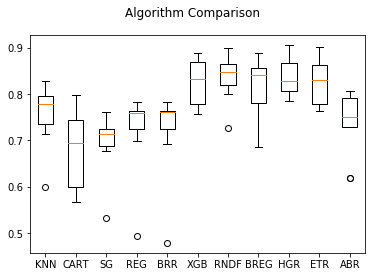

In [42]:
#SPOT CHECKING THE ALGORITHMS
# Spot-Check Algorithms

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SG',SGDRegressor()))
models.append(('REG',RidgeCV()))
models.append(('BRR',BayesianRidge()))
models.append(('XGB',XGBRegressor()))
models.append(("RNDF",RandomForestRegressor()))
models.append(("BREG",BaggingRegressor()))
models.append(("HGR",HistGradientBoostingRegressor()))
models.append(("ETR",ExtraTreesRegressor()))
models.append(("ABR",AdaBoostRegressor()))
## Root Mean Squared Log Error
#rmsle = math.sqrt(mean_squared_log_error())
#rmsle = make_scorer(math.sqrt(mean_squared_log_error()))
# evaluate each model in turn

def rmsle(y,ypred):
    y =np.array(y)
    ypred=np.array(ypred)
    assert len(y) == len(ypred)
    # X_used: numpy.ndarray  {n_samples, n_features_used}
    terms_to_sum= [(math.log(ypred[i]+1) - math.log(y[i]+1)) **2.0 for i,pred in enumerate(ypred)]
    return (sum(terms_to_sum)* (1.0/len(y))) ** 0.5

#scorer = {'main': 'r2',
 #         'custom_rmsle': make_scorer(rmsle,needs_xvals = True)}


results = []
names = []
seed =42
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, 
    scoring='r2')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
#print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

```
sorted(sklearn.metrics.SCORERS.keys())
help(type(LogisticRegression))
```

#### Voting Classifier

You can train your model using diverse algorithms and then ensemble them to predict the final output. Say, you use a Random ExtraTreesRegressor, HistGradientBoostingRegressor, RandomForestRegressor etc.; models are pitted against each other and selected upon best performance by voting using the VotingClassifier Class from sklearn.ensemble.

#### Hard voting 
This is where a model is selected from an ensemble to make the final prediction by a simple majority vote for accuracy.

#### Soft Voting
This can only be done when all your classifiers can calculate probabilities for the outcomes. Soft voting arrives at the best result by averaging out the probabilities calculated by individual algorithms.

In [43]:
#Voting Classifier

ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)

HGBR = HistGradientBoostingRegressor()
HGBR.fit(X_train,y_train)

RANDF = RandomForestRegressor()
RANDF.fit(X_train,y_train)

XGBOOST= XGBRegressor()
XGBOOST.fit(X_train,y_train)



ensemble=VotingRegressor(estimators=[('ETR', ETR),('HGBR',HGBR),("RANDF",RANDF),("XGBOOST",XGBOOST)])
y_pred =ensemble.fit(X_train,y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
print(r2_score(y_test, y_pred))
print(r2_score(y_pred,y_test ))

Test = normalize(rescaledTest)
knn_pred =ensemble.predict(Test)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(knn_pred)
#frpred["Id"] = Test["Id"]
fypred.to_csv("Voting_Regressor.csv", header =["Id","SalePrice"], index =False,sep="," )

0.1633211002937131
0.8558228229936022
0.8266730335925014


# Hyperparameter tunning
Hyperparameters contain the data that govern the training process itself.
The training process handles three categories of data as it trains your model:
- Input data (also called training data) is a collection of individual records (instances) containing the features important to your machine learning problem. This data is used during training to configure your model to accurately make predictions about new instances of similar data. However, the values in your input data never directly become part of your model.

- A model's parameters are the variables that your chosen machine learning technique uses to adjust to your data. Those weights are an example of your model's parameters. In many ways, your model's parameters are the model, they are what distinguishes your particular model from other models of the same type working on similar data.

- A hyperparameters are the variables that govern the training process itself. These variables are not directly related to the training data. They are configuration variables. Note that parameters change during a training job, while hyperparameters are usually constant during a job.

## Four Basic Methodologies of Hyperparameter Tuning:

####  Manual tuning:
With manual tuning, based on the current choice of parameters and their score, we change a part of them, train the model again, and check the difference in the score, without the use of automation in the selection of parameters to change and value of new parameters.

Advantage:
- You can learn the behavior of hyperparameters by heart and use your knowledge in another project. Therefore, I would recommend doing a manual tuning of major models at least once.

Disadvantage:
- Manual works are required.
- You may overthink about the unexpected movement of the score without trying many and checking if it was generalized movement.


#### Grid search
Grid search is an approach where we start from preparing the sets of candidates hyperparameters, train the model for every single set of them, and select the best performing set of hyperparameters

Advantage:
- You can cover all possible prospective sets of parameters. No matter how you strongly believed one set is most viable, who knows, the neighbor could be more successful. You do not lose that possibility with grid search.

Disadvantage:
- One run for one hyperparameter set takes some while. The run time of the whole parameter sets can be huge, and therefore the number of parameters to explore has practical limitations.


#### Randomized search
Randomized search is, on the other hand, an approach where we prepare the sets of candidates hyperparameters just as grid search, but next the hyperparameter set is randomly selected from prepared hyperparameters search space. Repeat the random selection, model training, and evaluation by the designated number of times we want to search the hyperparameters. Finally, select the best performing hyperparameter set.

Advantage:
- You do not have to worry about the run time because you can control the number of parameter searches.

Disadvantage:
- There should be some compromise that the finally selected hyperparameter set might not be the true best out of the ranges you put in the search.
- Depending on the number of searches and how large the parameter space is, some parameters might not be explored enough.


#### Bayesian optimization
In Bayesian optimization, it starts from random and narrowing the search space based on Bayesian approach.
From Bayesian theorem, you can understand it just updates the prior distribution of the belief about possible hyperparameter to the posterior distribution by the starting random searches.

Advantage:
- The search is potentially efficient (but not necessarily).

Disadvantage:
- Potentially trapped at local optimal.


### Approch Used:
We used the Grid search for to try and solve our challenges. However due to the high resource constraints we limite the parmeters to just a few.

#### Random Forest Regressor
ensemble of Decision trees is a Random Forest. Random Forests performs Bagging internally. Random Forest creates several trees, sometimes thousands, and calculates the best possible model for a given dataset. Instead of considering all features while splitting a node, Random Forest algorithm selects the best feature out of a subset of all features. This trades a higher bias for lower variance, which yields a much better model.

In [44]:
#parameters ={'bootstrap': [True, False],
 #            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
  #           'max_features': ['auto', 'sqrt'],
   #          'min_samples_leaf': [1, 2, 4],
    #         'min_samples_split': [2, 5, 10],
     #        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

parameters = {'n_estimators':range(1,10), 'max_depth':range(1,5)}
RANDF = RandomForestRegressor()
model = GridSearchCV(RANDF, parameters)
model.fit(X_train, y_train)
#print(model.best_estimator_)
#print(model.cv_results_)


RANDF = model.best_estimator_
RANDF.fit(X_train,y_train)
RANDF_pred = RANDF.predict(X_test)
MSE = mean_squared_error(RANDF_pred,y_test)
r2 = r2_score(RANDF_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(RANDF_pred, y_test))
print(MSE)
print(r2)
print(RMSLE)



1358270271.6337318
0.5761517983532825
0.21332814854046103


#### ExtraTreesRegressor

In [45]:
parameters = {'n_estimators':range(1,15), 'max_depth':range(1,10)}
ETR = ExtraTreesRegressor()
model = GridSearchCV(RANDF, parameters)
model.fit(X_train, y_train)
#print(model.best_estimator_)

ETR = model.best_estimator_
ETR.fit(X_train,y_train)
ETR_pred = ETR.predict(X_test)
MSE = mean_squared_error(ETR_pred,y_test)
r2 = r2_score(ETR_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(ETR_pred, y_test))
print(MSE)
print(r2)
print(RMSLE)

862585027.3162827
0.7730002093645381
0.17593159935361832


#### HistGradientBoostingRegressor

In [46]:
parameters = {'learning_rate':[0.1,0.2,0.3], 'max_depth':range(1,10),"random_state":[42]}
HGBR = HistGradientBoostingRegressor()
model = GridSearchCV(HGBR, parameters)
model.fit(X_train, y_train)
HGBR = model.best_estimator_
HGBR.fit(X_train,y_train)
HGBR_pred = HGBR.predict(X_test)
MSE = mean_squared_error(HGBR_pred,y_test)
r2 = r2_score(HGBR_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(HGBR_pred, y_test))
print(MSE)
print(r2)
print(RMSLE)

702508221.9736505
0.8318970696882572
0.16335714590300274


#### Grid Searsch Ridge Regressor

In [47]:
# Grid Searsch Ridge Regressor

parameters = [{'alpha':[0.001,0.1,1,100,1000,10000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR,parameters,cv=4)
Grid1.fit(X_train,y_train)
print(Grid1.best_estimator_)
scores = Grid1.cv_results_
print(scores['mean_test_score'])
Grid_pred = Grid1.predict(X_test)
MSE = mean_squared_error(Grid_pred,y_test)
r2 = r2_score(Grid_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(Grid_pred, y_test))
rmsle1 =rmsle(Grid_pred, y_test)
print(MSE)
print(r2)
print(RMSLE)
print(rmsle1)

alpha_vals =  [0.001, 0.1, 1, 100, 1000, 10000]

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
[0.72842475 0.73061736 0.70881336 0.27015228 0.03918095 0.00274529]
1169867828.7001438
0.674212342168579
0.2306325020055032
0.23063250200550314


#### K Nearest Neighbours Regressor

In [48]:
# KNN
# Number of neighbors to use by default for kneighbors queries.
k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range,p=[1,2])
#param_grid={'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'p':[1,2]}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='r2')
grid.fit(X_train,y_train)
print(grid.best_estimator_)
scores = grid.cv_results_

print(scores['mean_test_score'])


knn=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                    weights='uniform')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
MSE = mean_squared_error(knn_pred,y_test)
r2 = r2_score(knn_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(knn_pred,y_test))

print(MSE)
print(r2)
print(RMSLE)
#Test =Test.fillna(Test.mean(),inplace=True)
#Test.reshape(-1, 1)
Test = normalize(rescaledTest)
knn_pred =knn.predict(Test)

fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(knn_pred)
fypred.to_csv("Knn_rescaled2.csv", header =["Id","SalePrice"], index = False,sep="," )
#Test

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                    weights='uniform')
[0.71595774 0.70037617 0.76787566 0.73413921 0.7732702  0.74919442
 0.78000074 0.7541493  0.77965283 0.75537294 0.78445131 0.75765141
 0.78464006 0.75607562 0.78695083 0.75521909 0.7841421  0.7528319
 0.78179823 0.75189082 0.78184572 0.75105867 0.78075336 0.75188842
 0.77926345 0.7471007  0.77686035 0.74466972 0.77314259 0.74179279]
796785019.0525388
0.7716503377115467
0.17325223803597173


#### GridSearch XGBOOST

XGBoost assigns positive and negative values to every decision made. All Trees are weak learners and provide a decisions slightly better than a random guess. But collectively averaged out, XGBoost performs really well.XGBoost can work with Trees as well as Linear Models.

In [49]:
#GridSearch XGBOOST
#"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
X_test = normalize(X_test)
parameters ={
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "eta"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
 }
model = XGBRegressor()
Grid2 = GridSearchCV(model,parameters,cv=10,n_jobs=-1)
Grid2.fit(X_train,y_train)
y_pred = Grid2.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
MSE = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(MSE)
print(r2)
print(RMSLE)



682313135.5746768
0.8416964772804196
0.16421773251329325


In [50]:
# XGBoost
params={'eta':0.3,'max_depth':3,'objective':'multi:softprob', 'num_class':3}
steps = 40
#{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 #"max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 #"min_child_weight" : [ 1, 3, 5, 7 ],
 #"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 #"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
#eta=0.3,max_depth=4
model = Grid2.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MSE = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(MSE)
print(r2)
print(RMSLE)

Test = normalize(rescaledTest)
grid_preds =model.predict(rescaledTest)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(grid_preds)
#frpred["Id"] = Test["Id"]
fypred.to_csv("XGBOOST_rescaled.csv", header =["Id","SalePrice"], index = False,sep="," )

682313135.5746768
0.8416964772804196
0.16421773251329325


#### Voting Regressor with hyperparameters

In [51]:
HGBR = HistGradientBoostingRegressor()
HGBR.fit(X_train,y_train)

ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)

XGB = XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
                     gpu_id=-1, importance_type='gain', interaction_constraints=None,
                     learning_rate=0.100000001, max_delta_step=0, max_depth=4,
                     min_child_weight=7,  monotone_constraints=None,
                     n_estimators=100, n_jobs=0, num_parallel_tree=1,
                     objective='reg:squarederror', random_state=42, reg_alpha=0,
                     reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
                     validate_parameters=False, verbosity=None)
XGB.fit(X_train,y_train)

ensemble=VotingRegressor(estimators=[('HGBR', HGBR),('ETR',ETR),("XGBOOST",XGB)])
y_pred =ensemble.fit(X_train,y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
print(r2_score(y_test, y_pred))
print(r2_score(y_pred,y_test ))

Test = normalize(rescaledTest)
VC_test =ensemble.predict(Test)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(VC_test)
#frpred["Id"] = Test["Id"]
fypred.to_csv("Voting_Regressor_HP.csv", header =["Id","SalePrice"], index =False,sep="," )

0.15894269986521686
0.8667007084001103
0.8417384238076959
